## Ejercicio 1

Resolver con Runge-Kutta orden 4 el sistema: $$\dot x = y-y^3$$ $$\dot y = -x -y^2$$
Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [3]:
# Primero definimos la función que nos da la lista de elementos de nuestra partición en función t0, tf y h

function listt(t0,tf,h)
    
    listt = linspace(t0,tf,Int(round((tf-t0)/h)))
    
    return listt
end

listt (generic function with 1 method)

In [4]:
# Definimos nuestra función del método de Runge-Kutta de orden 4 para una sistema de dos ecuaciones:

function runge_kutta_4(f,x0,listt)
    # Definimos una lista arbitraria sin definir los elementos que va a contener
    
    listx = []
    
    h = listt[2] - listt[1]
    
    # Condiciones iniciales
    x = x0

    # Introducimos nuestra condición inicial en nuestra lista:
    
    push!(listx,x)
    
    
    # Método de Runge-Kutta de orden 4
    for i in 1:length(listt)-1
        
    k1 = f(x, listt[i])
    k2 = f(x + h*(k1)/2, listt[i] + h/2) 
    k3 = f(x + h*(k2)/2, listt[i] + h/2)
    k4 = f(x + h*(k3), listt[i] + h)  
        
    # Sumamos las aportaciones de ki según el método de Runge-Kutta de orden 4
    x = x + h*(k1 + 2*(k2) + 2*(k3) + k4)/6 
    
    # Guardamos los valores de xi en la lista
    push!(listx,x)
    end
    
    return listx
end;

In [58]:
# Escribimos la funcion que define nuestra ecuación diferencial vectorial

f1(x,t) = [x[2] - (x[2])^3, - x[1] - (x[2])^2]

f1 (generic function with 1 method)

In [53]:
# Definimos nuestras listas con los valores de t

T1 = listt(0,10,0.01)

1000-element LinSpace{Float64}:
 0.0,0.01001,0.02002,0.03003,0.04004,…,9.95996,9.96997,9.97998,9.98999,10.0

In [5]:
using PyPlot

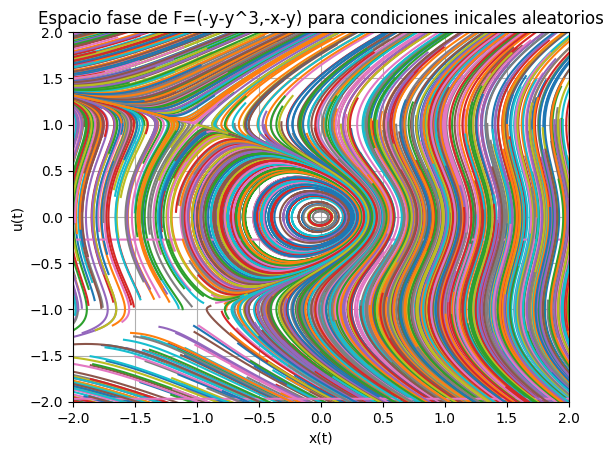

In [118]:
# Graficando el espacio fase para 3000 condiciones iniciales:

for i in 1:2000
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -3 y 3
    x0 = 3*(2*rand()-1)
    u0 = 3*(2*rand()-1)
    
    # Definimos listas que corresponden los valores de la posición x y velocidad u dada por la función de runge-kutta
    X=map(x->x[1],runge_kutta_4(f1,[x0,u0],T1))
    U=map(x->x[2],runge_kutta_4(f1,[x0,u0],T1))
    
    # Graficamos
    plot(X,U)
end
    
# Fijamos los límites de nuestra gráfica de [-2,2] para ambos ejes.
gca()[:set_xlim]((-2,2))
gca()[:set_ylim]((-2,2))
    
title("Espacio fase de F=(-y-y^3,-x-y) para condiciones inicales aleatorios")
xlabel("x(t)")
ylabel("u(t)")

grid("on")
show();

Tenemos que $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}} =(f_1,f_2)^{\text{T}}$. Entonces el Jacobiano de $\vec F$ está dado por:

$J=\left(\begin{array}{cc} 
 \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
 \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
 \end{array} \right) = \left(\begin{array}{cc} 
 0 & 1-3y^2 \\
 -1 & -2y
 \end{array} \right)$
 
 Evaluando en $\vec 0$,
 
$A = \left. J\right|_{\,\vec 0} = \left(\begin{array}{cc} 
 0 & 1 \\
 -1 & 0
 \end{array} \right)$

Por lo tanto, $\tau=\text{tr} A = 0$ y $\Delta= \det A = 1$. Por el diagrama visto en clase, concluimos que $\vec 0$ es un centro, que es lo que se observa de la gráfica anterior.

## Ejercicio 2 

Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

Para este caso, obtenemos la función $\vec F_2=\left(y, 0.5y(1-x^2)-x \right)^{\text{T}}$

In [89]:
# Escribimos la funcion que define nuestra ecuación diferencial vectorial

f4(x,t) = [x[2], 0.5*(x[2])*(1-(x[1])^2) - x[1]]

f4 (generic function with 1 method)

In [105]:
# Definimos nuestras listas con los valores de t

T2 = listt(0,20,0.01)

2000-element LinSpace{Float64}:
 0.0,0.010005,0.02001,0.030015,0.04002,…,19.95,19.96,19.97,19.98,19.99,20.0

In [ ]:
# Graficando el espacio fase para 3000 condiciones iniciales:

for i in 1:3000
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -4 y 4
    x0 = 4*(2*rand()-1)
    u0 = 4*(2*rand()-1)
    
    X=map(x->x[1],runge_kutta_4(f4,[x0,u0],T2))
    U=map(x->x[2],runge_kutta_4(f4,[x0,u0],T2))
    
    plot(X,U)
end

# Fijamos los límites de nuestra gráfica de [-4,4] para ambos ejes.
gca()[:set_xlim]((-4,4))
gca()[:set_ylim]((-4,4))
    
title("Espacio fase (x,u) de F=(y, 0.5y(1-x^2)-x) usando Runge-Kutta de orden 4 con 10 condiciones iniciales aleatorios")
xlabel("x(t)")
ylabel("u(t)")

grid("on")
show();

Se puede observar que las curvas que llegan quedan "atrapadas" dentro de un ciclo centrado en el origen y además, tienden al origen. Se observa un especie de remolino centrado en el origen.

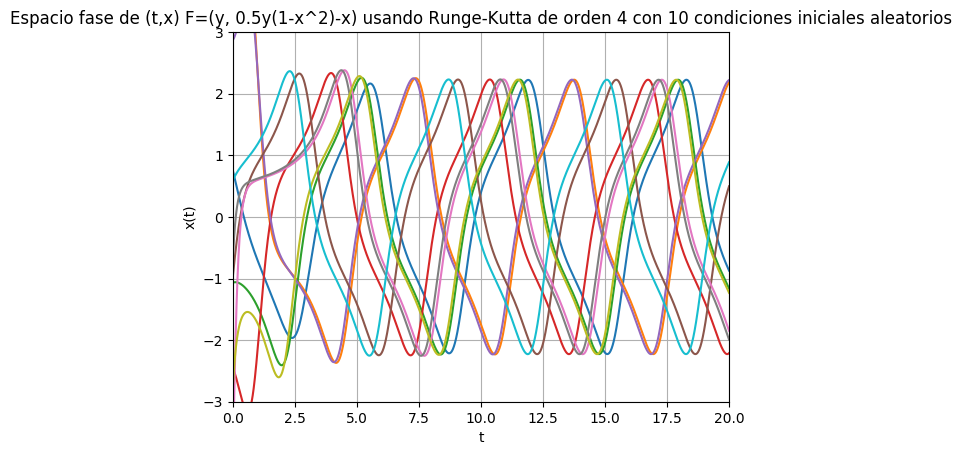

In [19]:
# Graficando el espacio fase para 10 condiciones iniciales:

for i in 1:10
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -4 y 4
    x0 = 4*(2*rand()-1)
    u0 = 4*(2*rand()-1)
    
    X=map(x->x[1],runge_kutta_4(f4,[x0,u0],T2))
    U=map(x->x[2],runge_kutta_4(f4,[x0,u0],T2))
    
    plot(T2,U)
end

# Fijamos los límites de nuestra gráfica para ambos ejes.
gca()[:set_xlim]((0,20))
gca()[:set_ylim]((-3,3))
    
title("Espacio fase de (t,x) F=(y, 0.5y(1-x^2)-x) usando Runge-Kutta de orden 4 con 10 condiciones iniciales aleatorios")
xlabel("t")
ylabel("x(t)")

grid("on")
show();

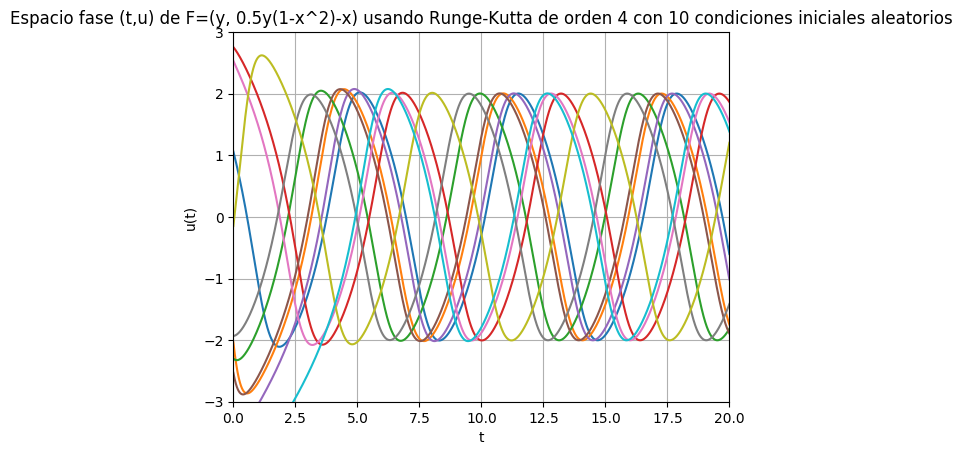

In [18]:
# Graficando el espacio fase para 7500 condiciones iniciales:

for i in 1:10
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -4 y 4
    x0 = 4*(2*rand()-1)
    u0 = 4*(2*rand()-1)
    
    X=map(x->x[1],runge_kutta_4(f4,[x0,u0],T2))
    U=map(x->x[2],runge_kutta_4(f4,[x0,u0],T2))
    
    plot(T2,X)
end

# Fijamos los límites de nuestra gráfica para ambos ejes.
gca()[:set_xlim]((0,20))
gca()[:set_ylim]((-3,3))
    
title("Espacio fase (t,u) de F=(y, 0.5y(1-x^2)-x) usando Runge-Kutta de orden 4 con 10 condiciones iniciales aleatorios")
xlabel("t")
ylabel("u(t)")

grid("on")
show();

En ambos casos observamos que $x(t)$ y $u(t)$ son aproximadamente periódicas después de un valor $t_0$ dado. Se puede notar  que tanto la posición así como la velocidad de la partícula, son periódicas, podemos concluir que la curva en el espacio fase es aproximadamente una curva cerrada. Esto es lo que se observa en el espacio fase $(x(t),u(t))$.

## Ejercicio 4

Hacer lo mismo para el sistema: $$ \dot x= x+y-x (x^2+y^2) \quad \dot y = y-x-y(x^2+y^2) $$ Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

In [22]:
# Escribimos la funcion que define nuestra ecuación diferencial vectorial

f10(x,t) = [x[1] + x[2] - (x[1])*((x[1])^2 + (x[2])^2), -x[1] + x[2] - (x[2])*((x[1])^2 + (x[2])^2)]

f10 (generic function with 1 method)

In [37]:
# Definimos nuestras listas con los valores de t

T3 = listt(0,10,0.01)

1000-element LinSpace{Float64}:
 0.0,0.01001,0.02002,0.03003,0.04004,…,9.95996,9.96997,9.97998,9.98999,10.0

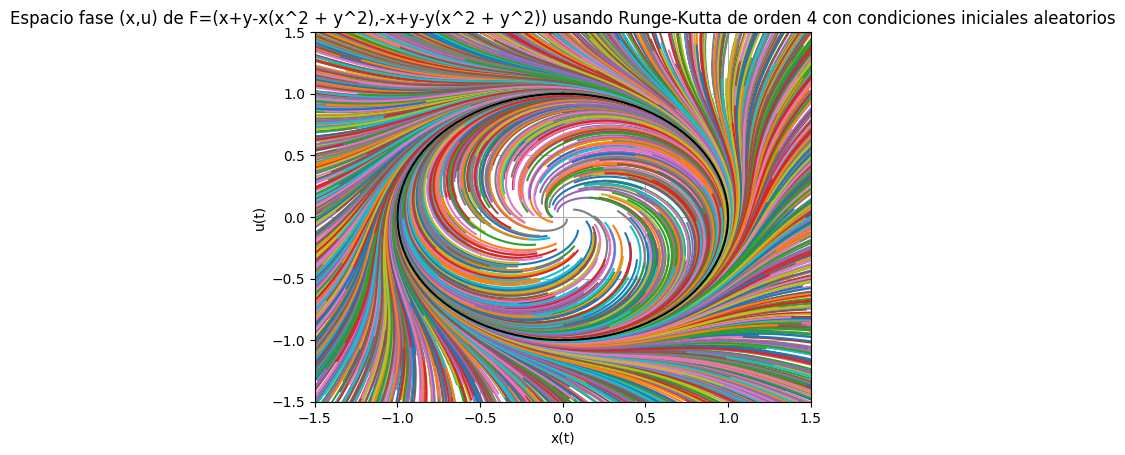

In [51]:
# Graficando el espacio fase para 3000 condiciones iniciales:

for i in 1:3000
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -4 y 4
    x0 = 2*(2*rand()-1)
    u0 = 2*(2*rand()-1)
    
    X=map(x->x[1],runge_kutta_4(f10,[x0,u0],T3))
    U=map(x->x[2],runge_kutta_4(f10,[x0,u0],T3))
    
    plot(X,U)
end

T5 = linspace(0,2*pi,100)
plot(sin(T5),cos(T5), color="black")

# Fijamos los límites de nuestra gráfica de [-4,4] para ambos ejes.
gca()[:set_xlim]((-1.5,1.5))
gca()[:set_ylim]((-1.5,1.5))
    
title("Espacio fase (x,u) de F=(x+y-x(x^2 + y^2),-x+y-y(x^2 + y^2)) usando Runge-Kutta de orden 4 con condiciones iniciales aleatorios")
xlabel("x(t)")
ylabel("u(t)")

grid("on")
show();